# Integración numérica de ODEs

En este práctico introduciremos los métodos de **Euler** y de **RK4** (Runge-Kutta de orden 4) de integración numérica de Ecuaciones Diferenciales Ordinarias (ODEs).

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

In [ ]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** Integrador de **Euler**

### Ecuaciones Diferenciales Ordinarias (ODEs)

El comportamiento de un sistema dinámico se suele describir en términos de trayectorias. Una trayectoria es una función del tiempo

\begin{eqnarray}
x:\mathbb{R}\ni t\to x(t)\in X
\end{eqnarray}

en donde $x(t)\in X$ representa el estado que exhibe el sistema al tiempo $t$ y $X$ es un espacio vectorial.
Típicamente, $X=\mathbb{R}^n$.

Las trayectorias de un sistema dinámico suelen ser soluciones de una ecuación diferencial.
Nosotros, nos enfocaremos en sistemas dinámicos caracterizados por Ecuaciones Diferenciales Ordinarias (ODEs).

Decimos que una trayectoria $x:t\to x(t)$ es su solución de una ODE caracterizada por una función

\begin{eqnarray}
f: X,\mathbb{R} \ni x,t \to f(x,t) \in X
\end{eqnarray}

cuando

\begin{eqnarray}
x'(t) = f(x(t),t)
\end{eqnarray}

para todo tiempo $t$ perteneciente a algún intervalo de tiempo $ T\subseteq \mathbb{R}$. Aquí, $x'(t)$ es la derivada con respecto al tiempo $t$ de la función $x:t\to x(t)$ que representa la trayectoria.

En una ODE, una trayectoria particular $x$ queda unívocamente determinada por el valor de $x(t)$ en algún tiempo específico. Típicamente, se considera una *condición incial* $x(a)$, y nos interesa computar el valor de $x(t)$ para todo $t\in [a,b]$, i.e. conocer la trayectoria para todo tiempo entre un tiempo incial $a$ y un tiempo final $b$.

### Métodos de integración numérica de ODEs

Los métodos de integración de sistemas de Ecuaciones Diferenciales Ordinarias (ODEs) consisten, básicamente, de dos partes.

* Un método de extrapolación que permita aproximar **un paso de integración**, i.e. aproximar $x(t+h)$ a partir de conocer $t$, $x(t)$ y $f$ para valores de $h\in \mathbb{R}$ suficientementes pequeños.

* Un **integrador** de sucesivas aproximaciones $w_0$, $w_1$, ..., $w_k$ de los valores $x(a)$, $x(a+h)$, $x(a+2h)$, ..., $x(a+kh)=x(b)$ computadas secuencialmente a partir de un valor incial $w_0=x(a)$.

Existen varios métodos de aproximar un paso de integración.
En cambio, el integrador suele ser común a los diferentes métodos.

### Método de Euler

El método de Euler es, quizás, el más simple que existe.
Esencialmente, consiste en aproximar de $x(t+h)$ utilizando $f(x,t)$ para calcular la extrapolación lineal

\begin{eqnarray}
x(t+h)
&=&
x(t) + x'(t)h + x''(t)\frac{h^2}{2} + ...
\\
&\approx &
x(t) + x'(t)h
\\
&=&
x(t) + f(x(t),t)h
\end{eqnarray}

para un valor de $h$ que sea relativamente pequeño.

### Integrador

Si $t_0,t_1,...,t_n$ son valores equiespaciados en el intervalo de tiempo $[a,b]$, entonces $t_j=a+jh$ para $j\in \{0,1,2,...,k\}$ con $t_k=b$ y $h=(b-a)/k$.
Luego, utilizando el método $m$ proveido por el usuario, se computan sucesivamente las aproximaciones

\begin{eqnarray}
w_{j} &=& m(f,w_{j-1},t_{j-1},h)
\end{eqnarray}

de los valores $x(t+ih)$ para $j=1,...,n$, partiendo de la condición inicial $w_0=x(t_0)=x(a)$.

Por ejemplo, si el método proveido es el de Euler, las aproximaciones adoptan la forma

\begin{eqnarray}
w_{j} &=& w_{j-1} + f(w_{j-1},t_{j-1})h
\end{eqnarray}

**1)** Implemente una función de Python llamada `euler` que compute un paso de integración según el método de **Euler**.
Dicha función debe tomar como argumentos:

* La función $f:\mathbb{R}^n,\mathbb{R} \to \mathbb{R}^n$ que caracterize el lado derecho de la ODE.

* Un valor de $x \in \mathbb{R}^n$.

* Un valor de $t \in \mathbb{R}$.

* El paso de integración $h \in \mathbb{R}$.

* Un vector de parámetros $p \in \mathbb{R}^m$.

La función  `euler` debe retornar el lado derecho de la aproximación $x(t+h)\approx x(t) + f(x(t),t)h$.

**2)** Implemente una función de Python llamada `integrador_ode` que integre el cómputo de sucesivos pasos de integración.
Dicha función debe tomar como argumentos:

* Una función `m` que aproxime el paso de integración (ej. `euler`).

* La función $f:\mathbb{R}^n,\mathbb{R} \to \mathbb{R}^n$.

* La condición inicial $x_0=x(a)\in \mathbb{R}^n$.

* El tiempo inciial $a\in \mathbb{R}$.

* El tiempo final $b\in \mathbb{R}$.

* El número $k\in \mathbb{N}$ de pasos de integración.

* Un vector de parámetros $p \in \mathbb{R}^m$.

* Y, opcionalmente, una *función condicionante*
\begin{eqnarray}
c:\mathbb{R}^n,\mathbb{R},\mathbb{R}^m\ni x(t),t,p \to c(x(t),t,p)\in \mathbb{R}^n
\end{eqnarray}
que permita intervenir en el cómputo de la trayectoria cuando se desee.
Veremos más adelante para que sirve esta función condicionante.

In [ ]:
# 2.1)
def euler(f,x,t,h,p):
    """
    Calcula un paso de integración del método de Euler.

    Argumentos de entrada:

        f : R^n,R -> R^n
        x = x(t) : R^n
        t = tiempo : R
        h = paso de tiempo : R
        p = parametros : R^q

    Retorna aproximacion numérica de

        x(t+h) : R^n

    según el método de Euler.

    # Ejemplos:
    """
    return x+h*f(x,t,p)

In [ ]:
# 2.2)
def integrador_ode(m,f,xa,a,b,k,p,c=lambda x,t,p:x):
    """
    Integra numéricamente la ODE

        dx/dt = f(x,t)

    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.

    Argumentos de entrada:

        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        xa = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q
        c = función condicionante : R^n,R,p -> R^n

    Retorna:

        t : R^{k+1} , t_j = a+j*h para j=0,1,...,k
        w : R^{n,k+1} , w_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k

    donde a+k*dt = b.
    """
    assert k>0
    n = len(xa)
    h = (b-a)/k
    w = np.zeros((n,k+1)) # Produce un array con forma y tipo especificada con los parametros,
                          # lleno de ceros. la forma puede ser espcificada con un entero o tupla (n,k+1)
    t = np.zeros(k+1)
    w[:,0] = xa           # actualiza la posicion inicial (columna de indice 0) de las variables con los valores
                          # de las condiciones iniciales
    t[0] = a              # actualiza la posicion cero con el valor del tiempo inicial

    for j in range(k):    #Aca se produce la iteración en j

        t[j+1] = t[j] + h                # iteracion tiempo
        w[:,j+1] = m(f,w[:,j],t[j],h,p)  # iteracion de w
        w[:,j+1] = c(w[:,j+1],t[j+1],p)  # condicion sobre w

    return t,w

## **Ejercicio 3)** Crecimiento exponencial

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
qx(t)
\end{eqnarray}

donde $q$ es una constante positiva.

**1)** Utilice el integrador ODE implementado en el ejercicio 2) para integrar la ODE arriba definida, a partir de la condición inicial $x(t=0)=1$ hasta el tiempo $t=3$, y para $q=1$. Utilice el paso de integración $h=0.1$.

**2)** Grafique la solución numérica computada en el inciso anterior. Incluya en el gráfico la solución exacta que se deriva a continuación

\begin{eqnarray}
x'(t)
&=&
qx(t)
\\
\frac{dx}{dt}
&=&
qx
\\
\frac{dx}{x}
&=&
qdt
\\
\int_{x(0)}^{x(\tau)}
\frac{dx}{x}
&=&
q
\int_0^{\tau} dt
\\
\ln(x(\tau))-\ln(x(0))
&=&
q\tau
\\
\ln(x(t))
&=&
qt
+
\ln(x(0))
\\
x(t)
&=&
e^{
qt
+
\ln(x(0))
}
\\
x(t)
&=&
e^{\ln(x(0))}
e^{qt}
\\
x(t)
&=&
x(0)
e^{qt}
\end{eqnarray}

**3)** Repita para $h=0.01$.

In [ ]:
#3.1)
def f(x,t,p):
    """
    q = p[0]
    """
    return p[0]*np.array(x[0])

In [ ]:
a=0
b=3
h=0.1
k = int((b-a)/h)#+1
xa = np.array([1]) # x(a)=x(0)=1
p = np.array([1])

In [ ]:
t,w = integrador_ode(euler,f,xa,a,b,k,p)

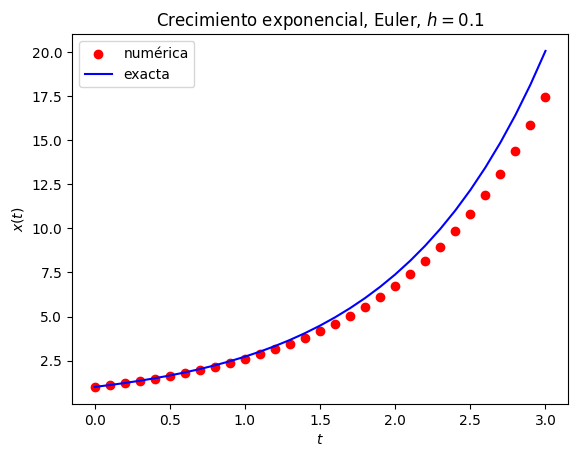

In [ ]:
# 3.2)
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
#plt.xlim(-0.1,5.1)
#plt.ylim(-0.1,1.1)
plt.scatter(t,w[0,:],label="numérica",linestyle='-',c='red')
plt.plot(t,np.exp(p[0]*t),label="exacta",linestyle='-',c='blue')
plt.title('Crecimiento exponencial, Euler, $h=0.1$')
plt.legend()

In [ ]:
# 3.3)

## **Ejercicio 4)** Convergencia exponencial

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
-qx(t)+r
\end{eqnarray}

donde $q$ es una constante positiva y $r$ es una constante arbitraria.

**1)** Use el integrador ODE con el método de Euler para encontrar una aproximación numérica de la ODE arriba especificada.
Considere la condición inicial $x(0)=3$ e integre hasta $t=3$.
Utilice el paso de integración $h=0.1$ y los valores de los parámetros $q=2$ y $r=3$.

**2)** Grafique la trayectoria computada en el inciso anterior y, con el fin de comparar, grafique simultaneamente la correspondiente solución analítica derivada a continuación

\begin{eqnarray}
\frac{dx}{dt}
&=&
-qx+r
\\
-\frac{1}{q}\frac{du}{dt}
&=&
u,
\;\;\;\;
\;\;\;\;
\;\;\;\;
u=-qx+r
\\
\frac{du}{dt}
&=&
-qu
\\
u(t)
&=&
u(0)e^{-qt}
\\
-qx(t)+r
&=&
(-qx(0)+r)e^{-qt}
\\
x(t)
&=&
(x(0)-r/q)e^{-qt}+r/q
\end{eqnarray}

**3)** Repita para $h=0.01$.

**4)** Repita para $x(0)=1$.

In [ ]:
# 4.1)

## **Ejercicio 5)** Ecuación Logística

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
rx(t)(1-x(t)/K)
\end{eqnarray}

**1)** Integre numéricamente la anterior ODE utilizando el método de Euler, la condición inicial $x(0)=0.1$, hasta $t=5$, utilizando un paso de integración $h=0.1$, una tasa de reproducción $r=1$ y una capacidad de carga $K=1$.

**2)** Grafique la solución computada en el inciso anterior, comparandola con la solución analítica que se deriva a continuación

\begin{eqnarray}
\frac{dx}{dt}
&=&
rx(1-x/K)
\\
\frac{dx}{x(1-x/K)}
&=&
rdt
\\
\int_{x(0)}^{x(t)}\frac{dx}{x(1-x/K)}
&=&
rt
\\
\int_{x(0)}^{x(t)}dx\,\frac{1}{x}+\frac{1}{K-x}
&=&
rt
\\
\ln(x(t))-\ln(x(0))
-
\ln(K-x(t))
+
\ln(K-x(0))
&=&
rt
\\
\ln\frac{x(t)}{K-x(t)}
&=&
rt
+
\ln\frac{x(0)}{K-x(0)}
\\
\frac{x(t)}{K-x(t)}
&=&
f(t)
=
\frac{x(0)}{K-x(0)}e^{rt}
\\
x(t)
&=&
(K-x(t))f(t)
\\
x(t)(1+f(t))
&=&
Kf(t)
\\
x(t)
&=&
K\frac{f(t)}{1+f(t)}
=
K\frac{1}{1+\frac{1}{f(t)}}
\\
x(t)
&=&
K\left(1+\frac{K-x(0)}{x(0)}e^{-rt}\right)^{-1}
\end{eqnarray}

**3)** Repita para $x(0)=1.5$.

In [ ]:
# 5.1)

## **Ejercicio 6)** Oscilador armónico

### Redución del orden de una ODE

Comunmente, una Ordinary Differential Equation (ODE) de orden $n$ tiene la siguiente forma

\begin{eqnarray}
y^{(n)}(t)
&=&
f(y(t),y'(t),y''(t),...,y^{(n-1)}(t),t)
\;\;\;\; (1)
\end{eqnarray}

donde $y^{(i)}$ denota la $i$-ésima derivada de $y$ respecto a $t$.
Dicha ODE es de dimensión $d$ si $x:\mathbb{R}\ni t\to y(t)\in \mathbb{R}^d$.

La ODE de la ecuación $(1)$ siempre puede reducirse a una ODE de primer orden y dimensión $nd$ utilizando la siguiente transformación

\begin{eqnarray}
x_1:t\to x_1(t) &:=& y(t) \\
x_2:t\to x_2(t) &:=& y'(t) = x_1'(t) \\
x_3:t\to x_3(t) &:=& y''(t) = x_2'(t) \\
&...& \\
x_n:t\to x_n(t) &:=& y^{(n-1)}(t) = x_{n-1}'(t) \\
x_n':t\to x_n'(t) &=& y^{(n)}(t)
\end{eqnarray}

que vale para todo $t\in [a,b]$. De esta manera, la ecuación $(1)$ adopta la forma

\begin{eqnarray}
x_{1}'(t) &=& x_2(t) \\
x_{2}'(t) &=& x_3(t) \\
&...& \\
x_{n-1}'(t) &=& x_n(t) \\
x_n'(t) &=& f(x_1(t),x_2(t),x_3(t),...,x_{n}(t),t)
\end{eqnarray}

lo cual constituye una ODE de primer orden y dimensión $nd$ como se mencionó.

### El oscilador armónico

El oscilador armónico viene descripto por la siguiente ODE

\begin{eqnarray}
y''(t) &=& -\alpha y(t)
\end{eqnarray}

Esta es una ODE de segundo orden, ya que aparece la derivada segunda de la función $x:t\to x(t)$.
La convertimos a una de primer orden definiendo $x_1=y$ y $x_2=y'$, obteniéndose

\begin{eqnarray}
x_1'(t) &=& x_2(t) \\
x_2'(t) &=& -\alpha x_1(t)
\end{eqnarray}

**1)** Utilice lo implementado en el ejecicio 2) para resolver en el intervalo de tiempo $[a,b]=[0,10]$ la ODE del oscilador armónico sujeto a las siguientes condiciones iniciales

\begin{eqnarray}
x_1(a) &=& y(a) = 1 \\
x_2(a) &=& y'(a) = 0
\end{eqnarray}

para $\alpha=3$ y usando un paso de integración $h=0.1$.

**2)** Grafique $x_1(t)$ vs $t$ y $x_2(t)$ vs $t$. No olvide agregar leyendas a los ejes y las curvas.
Use `np.scatter()` en vez de `np.plot()` para graficar usando puntos en vez de curvas.

**3)** Grafique $x_2(t)$ vs $x_1(t)$ paramétricamente en función de $t$.

In [ ]:
# 6.1)

## **Ejercicio 7)** Integrador de **RK4**

El método de Runge-Kutta de orden 4 utiliza la teoría de diferencias finitas para calcular la siguiente aproximación de orden 4to de un paso de integración.
A saber
\begin{eqnarray}
x(t+h)
&=&
x(t)
+
\frac{h}{6}
(k_1+2k_2+2k_3+k_4)
+
\mathcal{O}(h^5)
\end{eqnarray}

donde

\begin{eqnarray}
k_1 &=& f(x,t) \\
k_2 &=& f(x+hk_1/2,t+h/2) \\
k_3 &=& f(x+hk_2/2,t+h/2) \\
k_4 &=& f(x+hk_3,t+h)
\end{eqnarray}

**1)** Implemente el método de RK4.

**2)** Repita el ejercicio **6)** pero usando **RK4** en vez de **Euler**.

**3)** Nota alguna diferencia al comparar la solución obtenida con Euler y la solución obtenida con RK4?

In [ ]:
# 7.1)

### 7.3)
Observamos que con el método de Euler (ej. **7)**) la curva forma una espiral debido al error numérico que se acumula a medida que avanza el tiempo $t
. Por otr lado, vemos que con el método RK4, la curva forma un elipsoide, que es lo correcto.

## **Ejercicio 8)** Creando una "libreria" de integradores ODE

**1)** Exporte el actual notebook `redes-neuronales-2022-practico-4.ipynb` a `ode.py`.

**2)** Con su editor de texto favorito, elimine todo lo que sobra de `ode.py`. Deje, solamente, el código que:

* importa `numpy`.

* define la funcion `euler`.

* define la funcion `rk4`.

* define la funcion `integrador_ode`.

**3)** En google colab, suba el archivo `ode.py` anteriormente creado.

**4)** Importe la "libreria" `ode` escribiendo

    import ode

**5)** Pruebe la libreria `ode` escribiendo

    t,x = ode.integrador_ode(ode.rk4,f,xa,a,b,k,p)

In [ ]:
# 8.4)